<a href="https://colab.research.google.com/github/timmtimm1/Capstone/blob/main/GasolinePredictRF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd
from tqdm import tqdm
import datetime
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
tickers_names = { "CL=F": "Crude Oil",
                  "HO=F": "Heating Oil",
                  "NG=F": "Natural Gas",
                  "RB=F": "RBOB Gasoline",
                  "BZ=F": "Brent Crude Oil"}

In [ ]:
def fetch_data(ticker_symbol, commodity_name):
    ticker = yf.Ticker(ticker_symbol)
    today = datetime.date.today().strftime('%Y-%m-%d')
    data = ticker.history(start="1900-01-01", end=today)
    data.reset_index(inplace=True)

    # Check if the 'Date' column is of datetime type
    if pd.api.types.is_datetime64_any_dtype(data['Date']):
        data['Date'] = data['Date'].dt.strftime('%Y-%m-%d')

    # Drop the unnecessary columns
    data.drop(columns=['Dividends', 'Stock Splits', 'Adj Close'], inplace=True, errors='ignore')

    data['ticker'] = ticker_symbol
    data['commodity'] = commodity_name

    # Convert other column names to lowercase
    data.columns = [col.lower() for col in data.columns]

    # Reorder columns to have 'ticker' and 'commodity' at the beginning
    data = data[['ticker', 'commodity'] + [col for col in data.columns if col not in ['ticker', 'commodity']]]

    return data


# 2. Loop over each symbol and append data to the master DataFrame
all_data = []
for symbol, name in tqdm(tickers_names.items(), desc="Fetching data"):  # tqdm progress bar!
    all_data.append(fetch_data(symbol, name))

# Concatenate all the individual datasets into one
df = pd.concat(all_data, ignore_index=True)

Fetching data: 100%|██████████| 5/5 [00:02<00:00,  2.29it/s]


In [ ]:
df.head(15)

,ticker,commodity,date,open,high,low,close,volume
0,CL=F,Crude Oil,2000-08-23,31.950001,32.799999,31.950001,32.049999,79385
1,CL=F,Crude Oil,2000-08-24,31.900000,32.240002,31.400000,31.629999,72978
2,CL=F,Crude Oil,2000-08-25,31.700001,32.099998,31.320000,32.049999,44601
3,CL=F,Crude Oil,2000-08-28,32.040001,32.919998,31.860001,32.869999,46770
4,CL=F,Crude Oil,2000-08-29,32.820000,33.029999,32.560001,32.720001,49131
5,CL=F,Crude Oil,2000-08-30,32.750000,33.400002,32.099998,33.400002,79214
6,CL=F,Crude Oil,2000-08-31,33.250000,33.700001,32.970001,33.099998,56895
7,CL=F,Crude Oil,2000-09-01,33.049999,33.450001,32.750000,33.380001,45869
8,CL=F,Crude Oil,2000-09-05,33.950001,33.990002,33.419998,33.799999,55722
9,CL=F,Crude Oil,2000-09-06,33.990002,34.950001,33.830002,34.950001,74692


In [ ]:
df.shape


(28170, 8)

In [ ]:
df_RBOB = df[df['ticker'] == 'RB=F']
df_RBOB.head()

,ticker,commodity,date,open,high,low,close,volume
17998,RB=F,RBOB Gasoline,2000-11-01,0.8890,0.8970,0.882,0.8840,16223
17999,RB=F,RBOB Gasoline,2000-11-02,0.8750,0.8876,0.863,0.8688,17216
18000,RB=F,RBOB Gasoline,2000-11-03,0.8675,0.8750,0.860,0.8695,10170
18001,RB=F,RBOB Gasoline,2000-11-06,0.8600,0.8850,0.856,0.8825,16184
18002,RB=F,RBOB Gasoline,2000-11-07,0.8930,0.9000,0.886,0.8910,15717


In [ ]:
df_RBOB.shape

(5957, 8)

<Axes: xlabel='date', ylabel='close'>

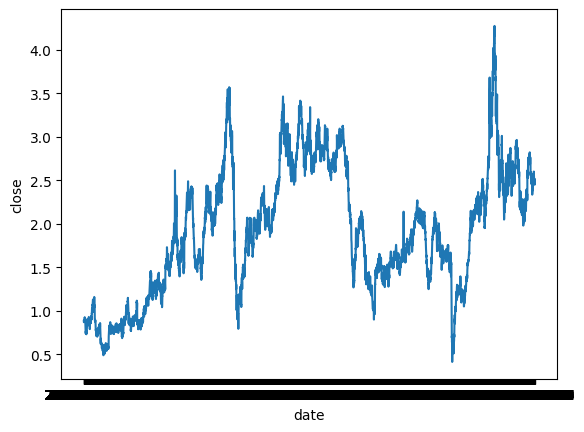

In [ ]:
sns.lineplot(x='date', y='close', data=df_RBOB)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28170 entries, 0 to 28169
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ticker     28170 non-null  object 
 1   commodity  28170 non-null  object 
 2   date       28170 non-null  object 
 3   open       28170 non-null  float64
 4   high       28170 non-null  float64
 5   low        28170 non-null  float64
 6   close      28170 non-null  float64
 7   volume     28170 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 1.7+ MB


In [ ]:
df_RBOB['date']=pd.to_datetime(df_RBOB['date'])

<Axes: xlabel='date', ylabel='close'>

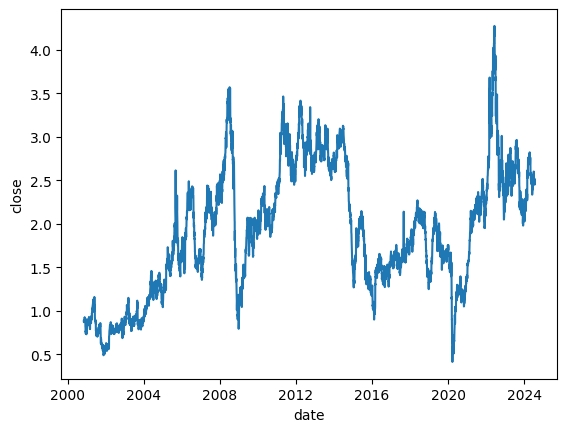

In [ ]:
sns.lineplot(x='date', y='close', data=df_RBOB)

In [ ]:
df_RBOB['Tomorrow'] = df_RBOB['close'].shift(-1)

In [ ]:
df_RBOB.head()

,ticker,commodity,date,open,high,low,close,volume,Tomorrow
17998,RB=F,RBOB Gasoline,2000-11-01,0.8890,0.8970,0.882,0.8840,16223,0.8688
17999,RB=F,RBOB Gasoline,2000-11-02,0.8750,0.8876,0.863,0.8688,17216,0.8695
18000,RB=F,RBOB Gasoline,2000-11-03,0.8675,0.8750,0.860,0.8695,10170,0.8825
18001,RB=F,RBOB Gasoline,2000-11-06,0.8600,0.8850,0.856,0.8825,16184,0.8910
18002,RB=F,RBOB Gasoline,2000-11-07,0.8930,0.9000,0.886,0.8910,15717,0.8742


In [ ]:
df_RBOB['Target'] = (df_RBOB['Tomorrow'] > df_RBOB['close']).astype(int)

In [ ]:
df_RBOB.head()

,ticker,commodity,date,open,high,low,close,volume,Tomorrow,Target
17998,RB=F,RBOB Gasoline,2000-11-01,0.8890,0.8970,0.882,0.8840,16223,0.8688,0
17999,RB=F,RBOB Gasoline,2000-11-02,0.8750,0.8876,0.863,0.8688,17216,0.8695,1
18000,RB=F,RBOB Gasoline,2000-11-03,0.8675,0.8750,0.860,0.8695,10170,0.8825,1
18001,RB=F,RBOB Gasoline,2000-11-06,0.8600,0.8850,0.856,0.8825,16184,0.8910,1
18002,RB=F,RBOB Gasoline,2000-11-07,0.8930,0.9000,0.886,0.8910,15717,0.8742,0


In [ ]:
df_RBOB.drop('ticker', inplace=True, axis=1)

In [ ]:
df_RBOB.drop('commodity', inplace=True, axis=1)

In [ ]:
df_RBOB.head()

,open,high,low,close,volume,Tomorrow,Target
date,,,,,,,
2000-11-01,0.8890,0.8970,0.882,0.8840,16223,0.8688,0
2000-11-02,0.8750,0.8876,0.863,0.8688,17216,0.8695,1
2000-11-03,0.8675,0.8750,0.860,0.8695,10170,0.8825,1
2000-11-06,0.8600,0.8850,0.856,0.8825,16184,0.8910,1
2000-11-07,0.8930,0.9000,0.886,0.8910,15717,0.8742,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_estimators=250, min_samples_split=100, random_state=1)

train = df_RBOB.iloc[:-100]
test = df_RBOB.iloc[-100:]

predictors = ['open', 'high', 'low', 'volume']
model.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=100, n_estimators=250, random_state=1)

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
precision_score(test['Target'], model.predict(test[predictors]))

0.5194805194805194

In [ ]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train['Target'])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds, index=test.index, name='Predictions')
  combined = pd.concat([test['Target'], preds], axis=1)
  return combined

In [ ]:
def backtest(data, model, predictors, start=2000, step=250):
  all_predictions = []

  for i in range(start, data.shape[0], step):
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(i+step)].copy()
    predictions = predict(train, test, predictors, model)
    all_predictions.append(predictions)

  return pd.concat(all_predictions)

In [ ]:
predictions = backtest(df_RBOB, model, predictors)

In [ ]:
predictions['Predictions'].value_counts()

Predictions
1    2324
0    1633
Name: count, dtype: int64

In [ ]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5370051635111877

In [ ]:
predictions['Target'].value_counts()/predictions.shape[0]

Target
1    0.525145
0    0.474855
Name: count, dtype: float64

In [ ]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
  rolling_averages = df_RBOB.rolling(horizon).mean()

  ratio_column = f"Close_Ratio_{horizon}"
  df_RBOB[ratio_column] = df_RBOB['close']

  trend_column = f"Trend_{horizon}"
  df_RBOB[trend_column] = df_RBOB.shift(1).rolling(horizon).sum()['Target']

  new_predictors+= [ratio_column, trend_column]

In [ ]:
df_RBOB.sample(15)

,open,high,low,close,volume,Tomorrow,Target,Close_Ratio_2,Close_Ratio_5,Close_Ratio_60,Close_Ratio_250,Close_Ratio_1000,Trend_2,Trend_5,Trend_60,Trend_250,Trend_1000
date,,,,,,,,,,,,,,,,,
2008-02-20,2.5990,2.6100,2.5485,2.5852,31007,2.5220,0,2.5852,2.5852,2.5852,2.5852,2.5852,1.0,4.0,28.0,136.0,518.0
2018-04-09,1.9525,1.9908,1.9500,1.9842,70513,2.0409,1,1.9842,1.9842,1.9842,1.9842,1.9842,1.0,4.0,33.0,136.0,497.0
2011-04-07,3.1888,3.1961,3.1600,3.1865,55449,3.2607,1,3.1865,3.1865,3.1865,3.1865,3.1865,0.0,3.0,34.0,127.0,525.0
2017-07-24,1.5575,1.5787,1.5444,1.5568,33923,1.5962,1,1.5568,1.5568,1.5568,1.5568,1.5568,0.0,2.0,33.0,132.0,480.0
2009-03-12,1.2526,1.3553,1.2404,1.3457,33433,1.3529,1,1.3457,1.3457,1.3457,1.3457,1.3457,1.0,3.0,33.0,125.0,514.0
2002-02-28,0.5850,0.5945,0.5760,0.5880,30276,0.7060,1,0.5880,0.5880,0.5880,0.5880,0.5880,2.0,3.0,30.0,125.0,NaN
2009-03-04,1.3235,1.3845,1.3050,1.3816,46044,1.3127,0,1.3816,1.3816,1.3816,1.3816,1.3816,2.0,4.0,33.0,127.0,515.0
2023-07-13,2.6716,2.6888,2.6422,2.6786,56357,2.6437,0,2.6786,2.6786,2.6786,2.6786,2.6786,2.0,4.0,34.0,138.0,565.0
2016-04-01,1.4435,1.4495,1.3980,1.4016,63723,1.3770,0,1.4016,1.4016,1.4016,1.4016,1.4016,0.0,1.0,28.0,116.0,473.0


In [ ]:
df_RBOB = df_RBOB.dropna()

In [ ]:
model = RandomForestClassifier(n_estimators=245, min_samples_split=50, random_state=1)

In [ ]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train['Target'])
  preds = model.predict_proba(test[predictors])[:,1]
  preds[preds >=.6] = 1
  preds[preds < .6] = 0
  preds = pd.Series(preds, index=test.index, name='Predictions')
  combined = pd.concat([test['Target'], preds], axis=1)
  return combined

In [ ]:
predictions = backtest(df_RBOB, model, new_predictors)

In [ ]:
predictions['Predictions'].value_counts()

Predictions
0.0    2396
1.0     560
Name: count, dtype: int64

In [ ]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5553571428571429